# Kaggle - Tabular Playground Series - Jan 2022

# 1. Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 2. Data

In [2]:
#paths to the Github repo

train_path = 'https://raw.githubusercontent.com/ccollado7/kaggle-tps-jan2022/main/data/raw/train.csv'
test_path = 'https://raw.githubusercontent.com/ccollado7/kaggle-tps-jan2022/main/data/raw/test.csv'

In [3]:
#train dataset

train = pd.read_csv(train_path)
train.head()

,row_id,date,country,store,product,num_sold
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911


In [4]:
# data tyes

train.dtypes

row_id       int64
date        object
country     object
store       object
product     object
num_sold     int64
dtype: object

In order to perform analysis by time periods, I incorporate columns with these values

In [5]:
train['year'] = pd.to_datetime(train['date']).dt.year
train['month'] = pd.to_datetime(train['date']).dt.month
train['week'] = pd.to_datetime(train['date']).dt.week
train['day_month'] = pd.to_datetime(train['date']).dt.day
train['day_year'] = pd.to_datetime(train['date']).dt.dayofyear #Number of day from 1 to 365

train.sample(10)

,row_id,date,country,store,product,num_sold,year,month,week,day_month,day_year
1849,1849,2015-04-13,Sweden,KaggleMart,Kaggle Hat,502,2015,4,16,13,103
5352,5352,2015-10-25,Norway,KaggleMart,Kaggle Mug,383,2015,10,43,25,298
9034,9034,2016-05-16,Sweden,KaggleRama,Kaggle Hat,748,2016,5,20,16,137
5576,5576,2015-11-06,Sweden,KaggleMart,Kaggle Sticker,127,2015,11,45,6,310
189,189,2015-01-11,Norway,KaggleRama,Kaggle Mug,717,2015,1,2,11,11
9180,9180,2016-05-25,Finland,KaggleMart,Kaggle Mug,142,2016,5,21,25,146
20346,20346,2018-02-04,Norway,KaggleMart,Kaggle Mug,487,2018,2,5,4,35
9184,9184,2016-05-25,Finland,KaggleRama,Kaggle Hat,548,2016,5,21,25,146
14720,14720,2017-03-28,Sweden,KaggleMart,Kaggle Sticker,109,2017,3,13,28,87
14155,14155,2017-02-25,Norway,KaggleMart,Kaggle Hat,870,2017,2,8,25,56


In [6]:
#test dataset

test = pd.read_csv(test_path)
test.head()

,row_id,date,country,store,product
0,26298,2019-01-01,Finland,KaggleMart,Kaggle Mug
1,26299,2019-01-01,Finland,KaggleMart,Kaggle Hat
2,26300,2019-01-01,Finland,KaggleMart,Kaggle Sticker
3,26301,2019-01-01,Finland,KaggleRama,Kaggle Mug
4,26302,2019-01-01,Finland,KaggleRama,Kaggle Hat


# 3. Analysis - Train dataset

## 3.1 General Analysis

In [85]:
#general statistics

train.describe()

,row_id,num_sold,year,month,week,day_month,day_year
count,26298.000000,26298.000000,26298.000000,26298.000000,26298.000000,26298.000000,26298.000000
mean,13148.500000,387.533577,2016.499658,6.522930,26.661875,15.729637,183.125257
std,7591.723026,266.076193,1.117749,3.448769,15.064397,8.800259,105.440647
min,0.000000,70.000000,2015.000000,1.000000,1.000000,1.000000,1.000000
25%,6574.250000,190.000000,2016.000000,4.000000,14.000000,8.000000,92.000000
50%,13148.500000,315.000000,2016.000000,7.000000,27.000000,16.000000,183.000000
75%,19722.750000,510.000000,2017.000000,10.000000,40.000000,23.000000,274.000000
max,26297.000000,2884.000000,2018.000000,12.000000,53.000000,31.000000,366.000000


In [88]:
#nulls per column

train.isnull().sum()

row_id       0
date         0
country      0
store        0
product      0
num_sold     0
year         0
month        0
week         0
day_month    0
day_year     0
dtype: int64

Text(0.5, 1.0, 'Records per country')

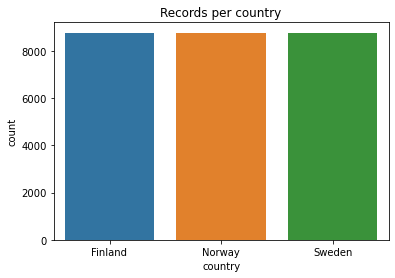

In [32]:
#Number of records per country

sns.countplot(x="country", data=train).set_title('Records per country')

Text(0.5, 1.0, 'Records per store')

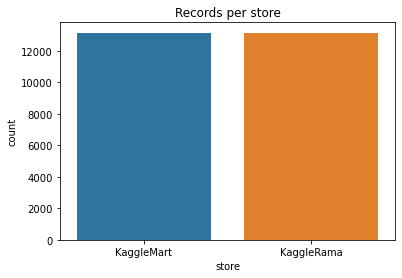

In [33]:
#Number of records per store

sns.countplot(x="store", data=train).set_title('Records per store')

Text(0.5, 1.0, 'Records per product')

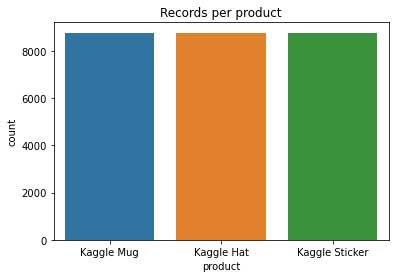

In [34]:
#Number of records per product

sns.countplot(x="product", data=train).set_title('Records per product')

Text(0.5, 1.0, 'KDE solds per country')

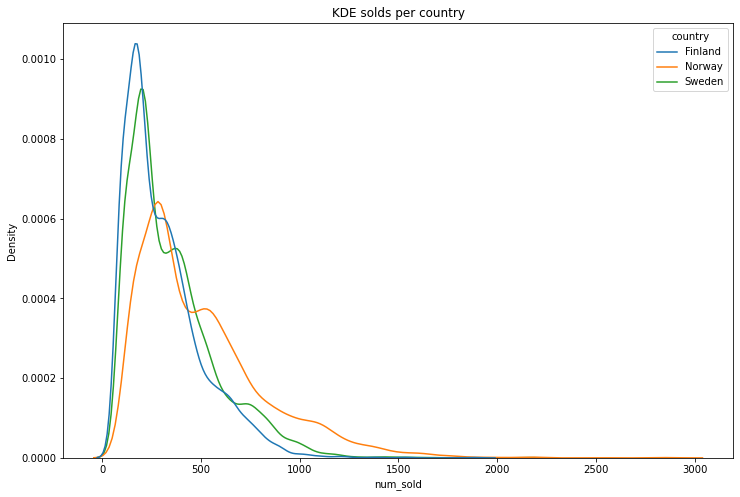

In [36]:
#distribution of number of sales depending on the country

plt.figure(figsize=(12,8))
sns.kdeplot(data=train, x="num_sold", hue="country").set_title('KDE solds per country')

Text(0.5, 1.0, 'KDE solds per store')

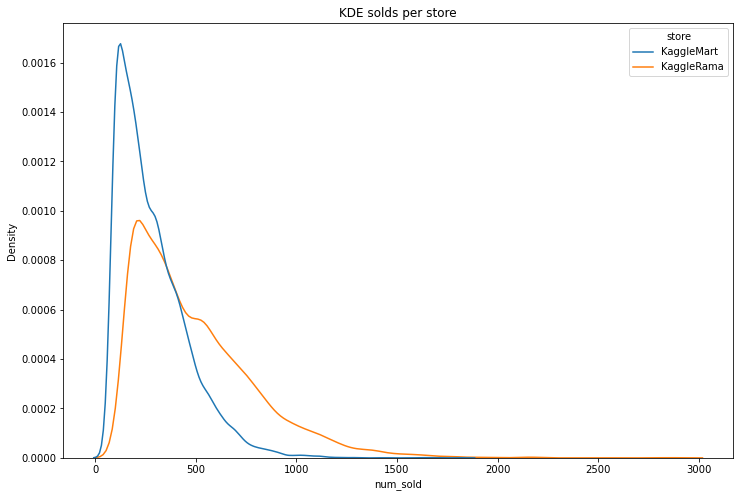

In [37]:
#distribution of number of sales depending on the store

plt.figure(figsize=(12,8))
sns.kdeplot(data=train, x="num_sold", hue="store").set_title('KDE solds per store')

Text(0.5, 1.0, 'KDE solds per product')

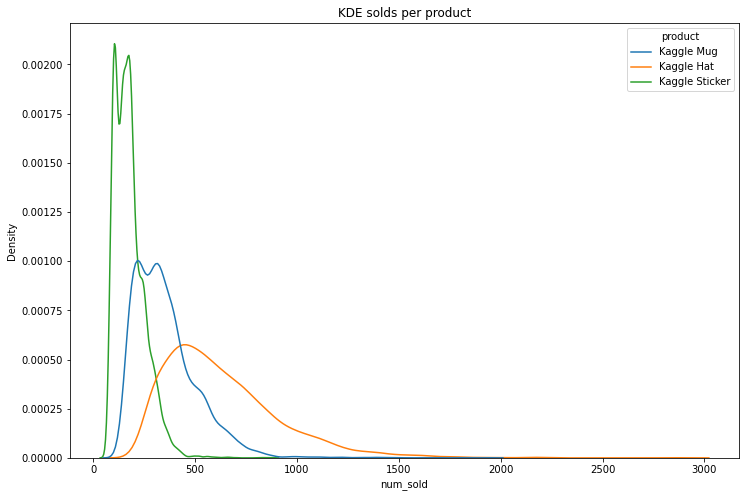

In [38]:
#distribution of number of sales depending on the product

plt.figure(figsize=(12,8))
sns.kdeplot(data=train, x="num_sold", hue="product").set_title('KDE solds per product')

Text(0.5, 1.0, 'Sales according to the day of the year')

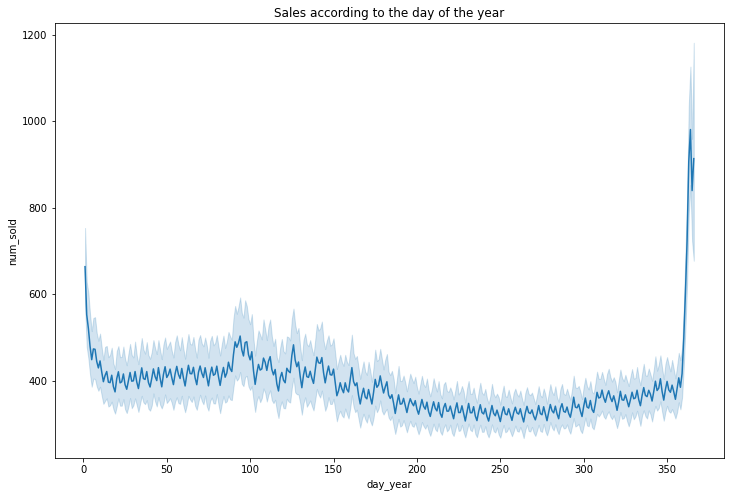

In [39]:
#Quantity sold depending on the day of the year

plt.figure(figsize=(12,8))
sns.lineplot(data=train, x="day_year", y="num_sold").set_title('Sales according to the day of the year')

Text(0.5, 1.0, 'Sales according to the day of the year and the country')

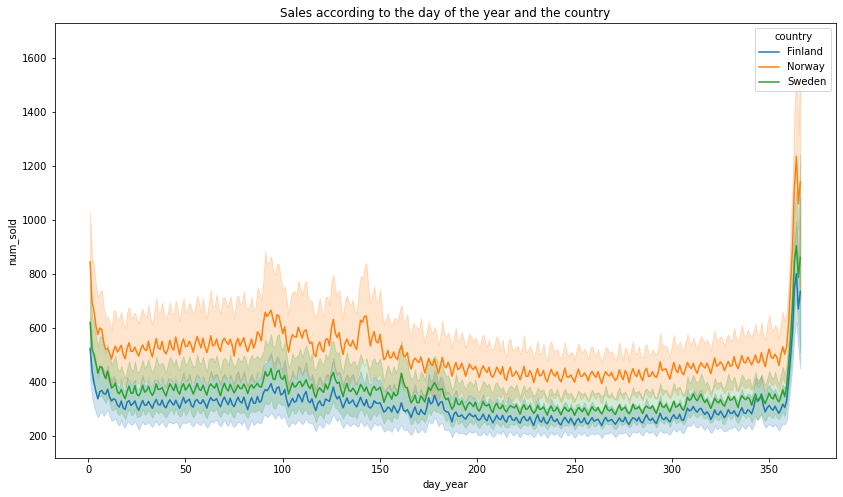

In [40]:
#Quantity sold by country depending on the day of the year

plt.figure(figsize=(14,8))
sns.lineplot(data=train, x="day_year", y="num_sold",hue="country").set_title('Sales according to the day of the year and the country')

Text(0.5, 1.0, 'Sales according to the day of the year and the store')

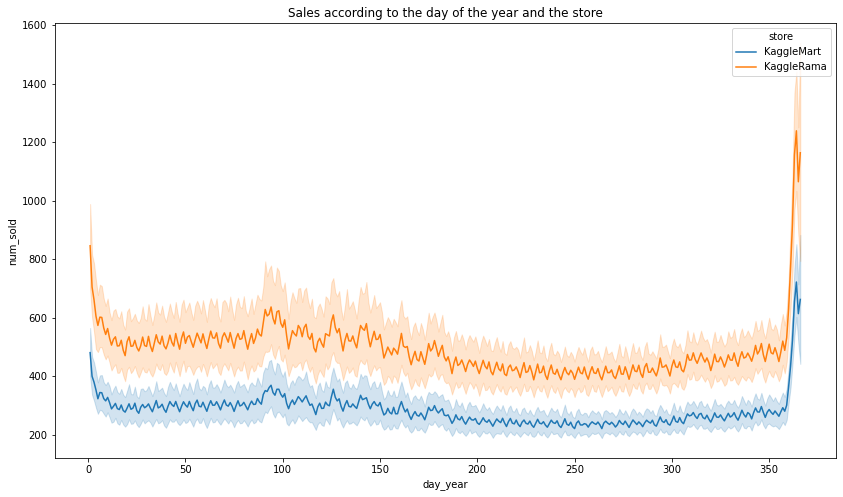

In [41]:
#Quantity sold per store depending on the day of the year

plt.figure(figsize=(14,8))
sns.lineplot(data=train, x="day_year", y="num_sold",hue="store").set_title('Sales according to the day of the year and the store')

Text(0.5, 1.0, 'Sold by type of product depending on the day of the year')

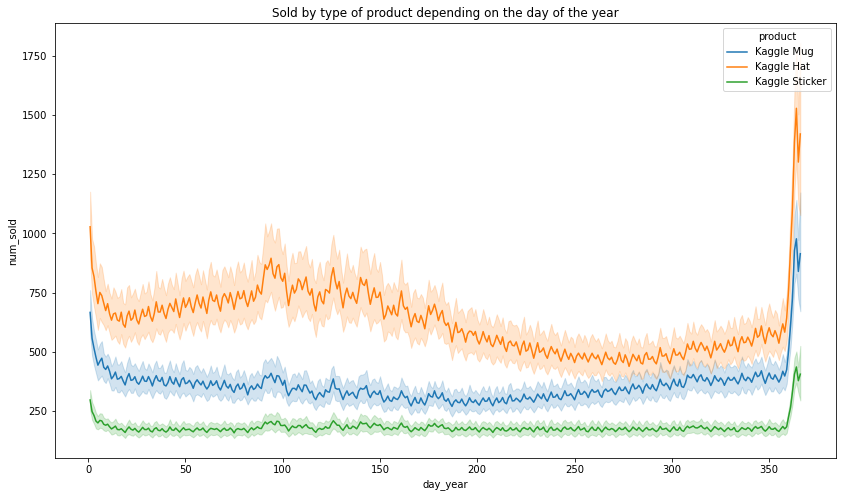

In [49]:
#Quantity sold by type of product depending on the day of the year

plt.figure(figsize=(14,8))
sns.lineplot(data=train, x="day_year", y="num_sold",hue="product").set_title('Sold by type of product depending on the day of the year')

Text(0.5, 1.0, 'Boxplot - Sold per country')

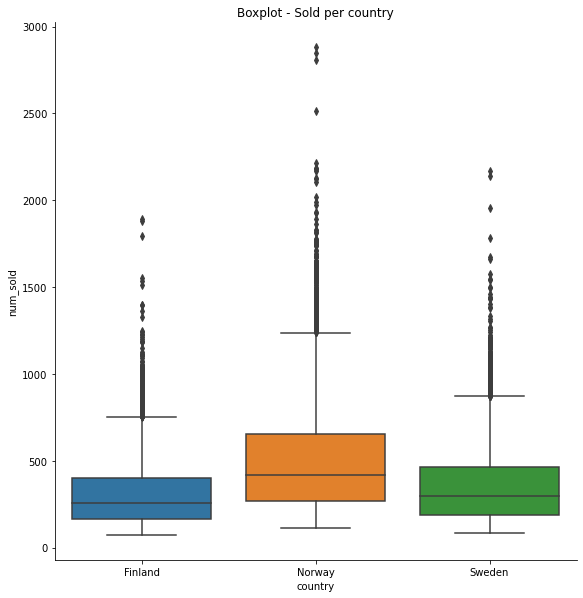

In [42]:
#Quantity sold per country

sns.catplot(x="country", y="num_sold", kind="box", data=train,height=8, aspect=1)
plt.title('Boxplot - Sold per country')

Text(0.5, 1.0, 'Boxplot - Sold per country and per year')

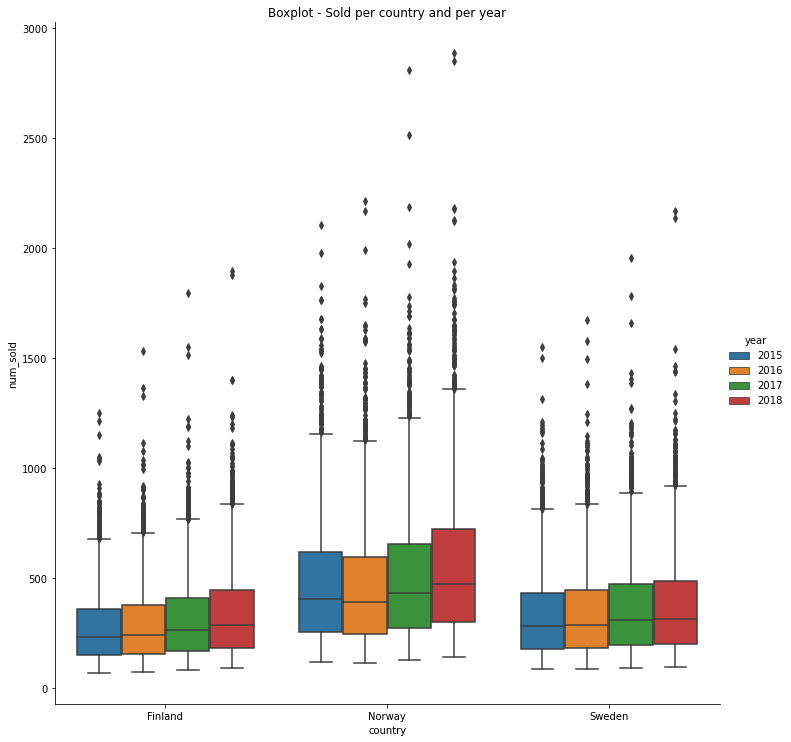

In [43]:
#Quantity sold per country and per year

sns.catplot(x="country", y="num_sold", hue="year", kind="box", data=train,height=10, aspect=1)
plt.title('Boxplot - Sold per country and per year')

Text(0.5, 1.0, 'Boxplot - Sold by country and by store')

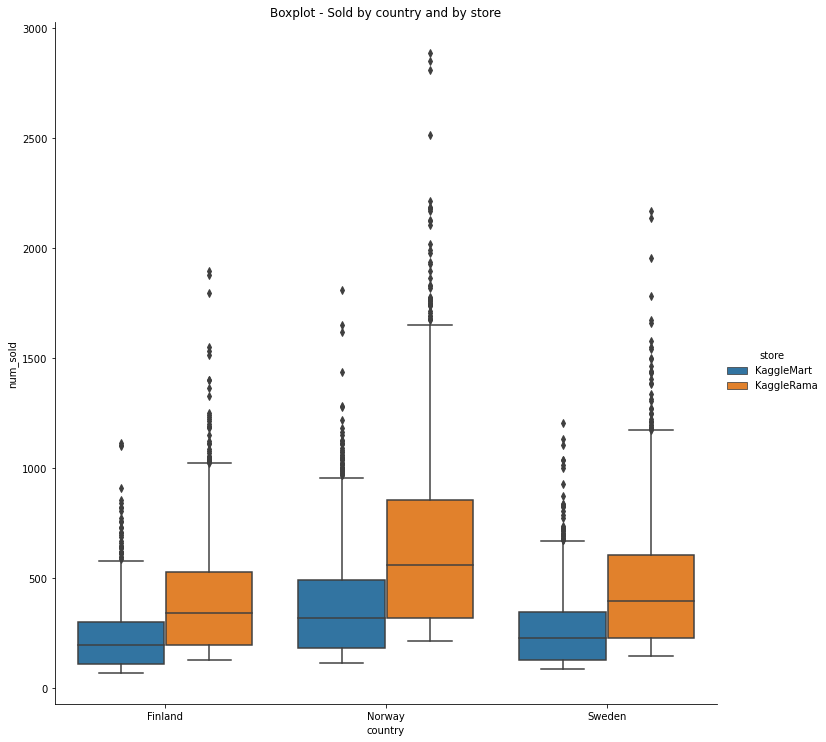

In [44]:
#Quantity sold by country and by store

sns.catplot(x="country", y="num_sold", hue="store", kind="box", data=train,height=10, aspect=1)
plt.title('Boxplot - Sold by country and by store')

Text(0.5, 1.0, 'Boxplot - Sold per store and per year')

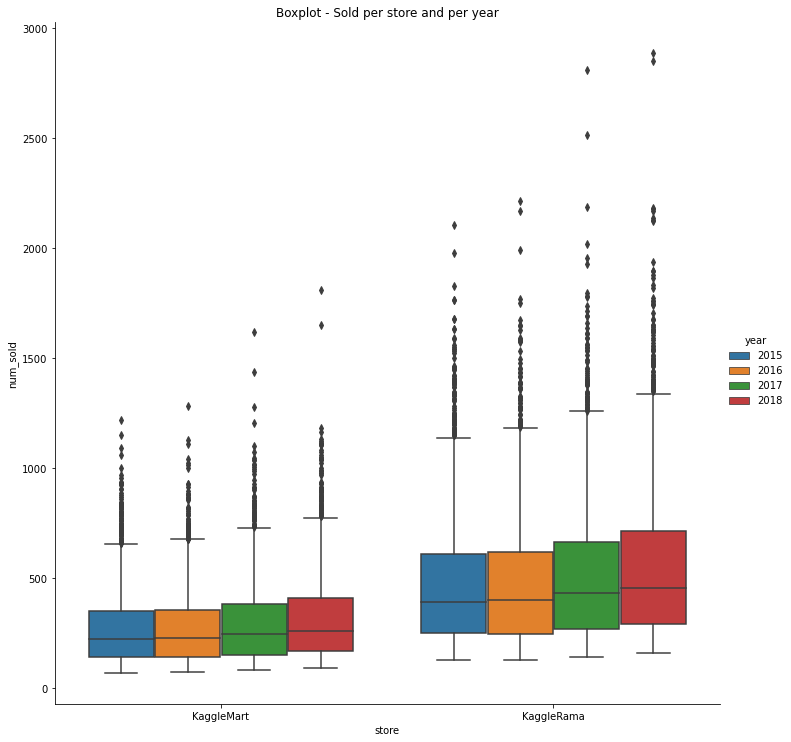

In [45]:
#Quantity sold per store and per year

sns.catplot(x="store", y="num_sold", hue="year", kind="box", data=train,height=10, aspect=1)
plt.title('Boxplot - Sold per store and per year')

Text(0.5, 1.0, 'Boxplot - Sold by country and by product')

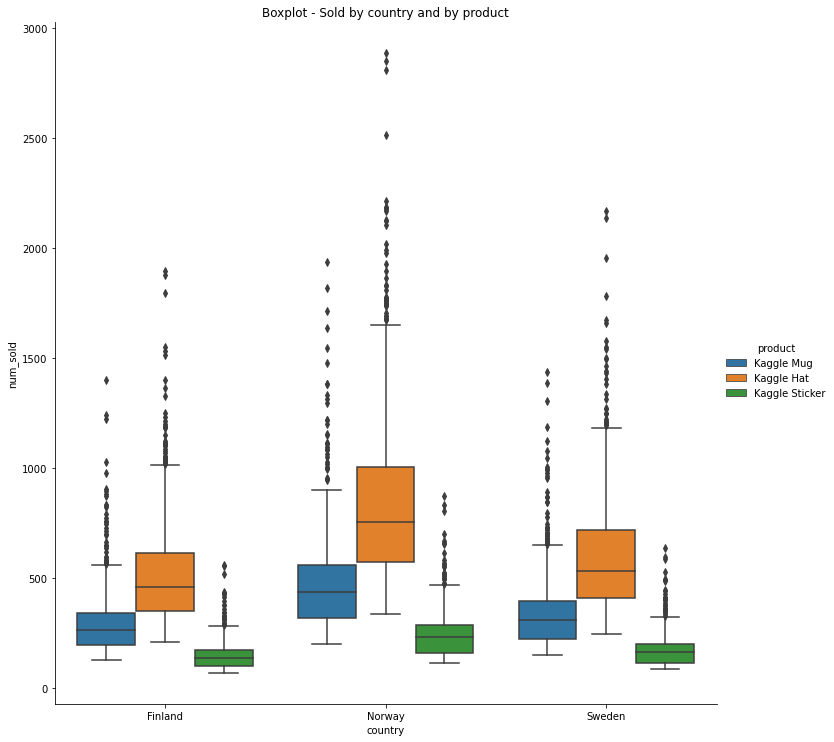

In [46]:
#Quantity sold by country and by product

sns.catplot(x="country", y="num_sold", hue="product", kind="box", data=train,height=10, aspect=1)
plt.title('Boxplot - Sold by country and by product')

Text(0.5, 1.0, 'Boxplot - Sold per product and per year')

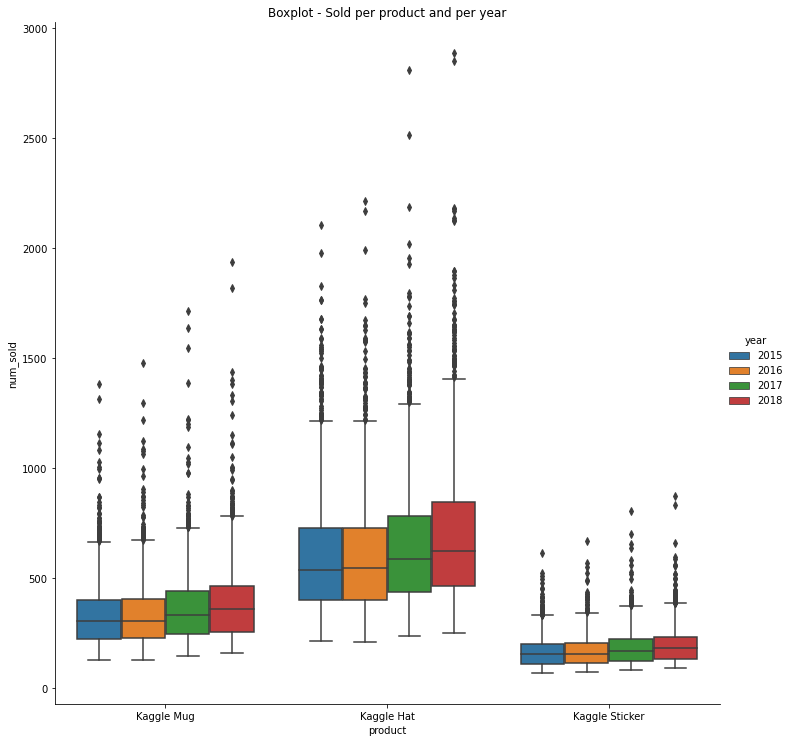

In [47]:
#Quantity sold per product and per year

sns.catplot(x="product", y="num_sold", hue="year", kind="box", data=train,height=10, aspect=1)
plt.title('Boxplot - Sold per product and per year')

Text(0.5, 1.0, 'Boxplot - Sold per store and per product')

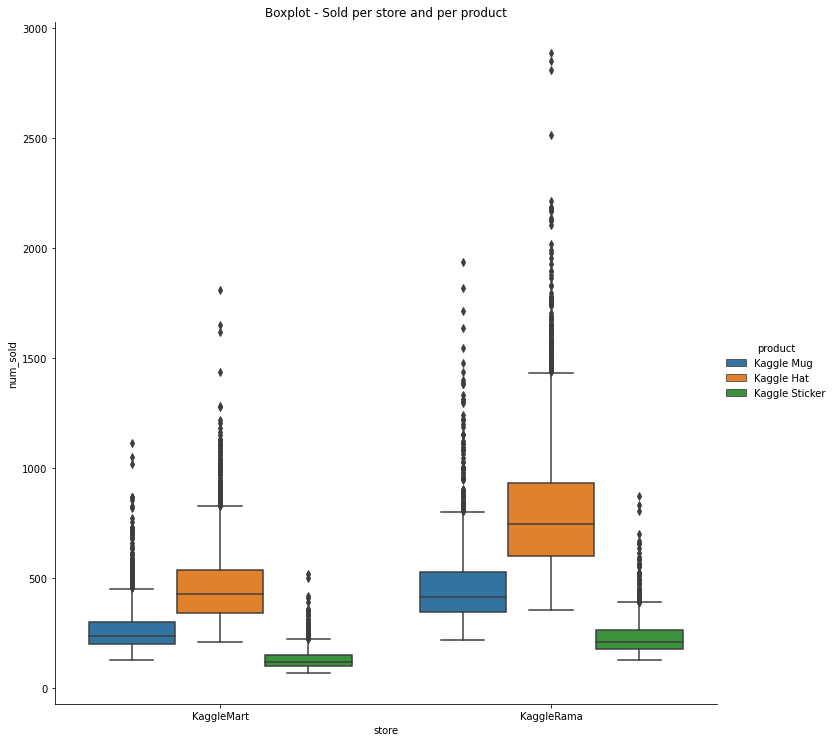

In [48]:
#Quantity sold per store and per product

sns.catplot(x="store", y="num_sold", hue="product", kind="box", data=train,height=10, aspect=1)
plt.title('Boxplot - Sold per store and per product')

## 3.2  Country Analysis

In [52]:
#train - Finland

train_finland = train[train['country'] == 'Finland']
train_finland.head()

,row_id,date,country,store,product,num_sold,year,month,week,day_month,day_year
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329,2015,1,1,1,1
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520,2015,1,1,1,1
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146,2015,1,1,1,1
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572,2015,1,1,1,1
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911,2015,1,1,1,1


In [54]:
#train - Norway

train_norway = train[train['country'] == 'Norway']
train_norway.head()

,row_id,date,country,store,product,num_sold,year,month,week,day_month,day_year
6,6,2015-01-01,Norway,KaggleMart,Kaggle Mug,526,2015,1,1,1,1
7,7,2015-01-01,Norway,KaggleMart,Kaggle Hat,906,2015,1,1,1,1
8,8,2015-01-01,Norway,KaggleMart,Kaggle Sticker,250,2015,1,1,1,1
9,9,2015-01-01,Norway,KaggleRama,Kaggle Mug,1005,2015,1,1,1,1
10,10,2015-01-01,Norway,KaggleRama,Kaggle Hat,1461,2015,1,1,1,1


In [ ]:
#train - Sweden

train_sweden = train[train['country'] == 'Sweden']
train_sweden.head()

In [58]:
countrys = train['country'].unique()

### Solds by year

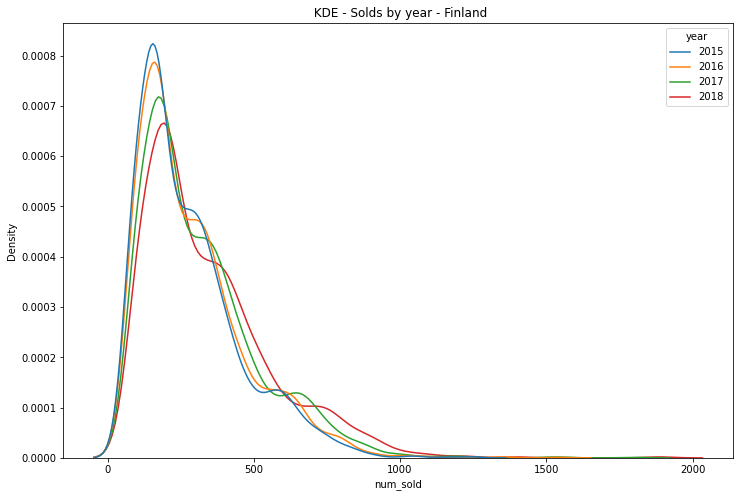

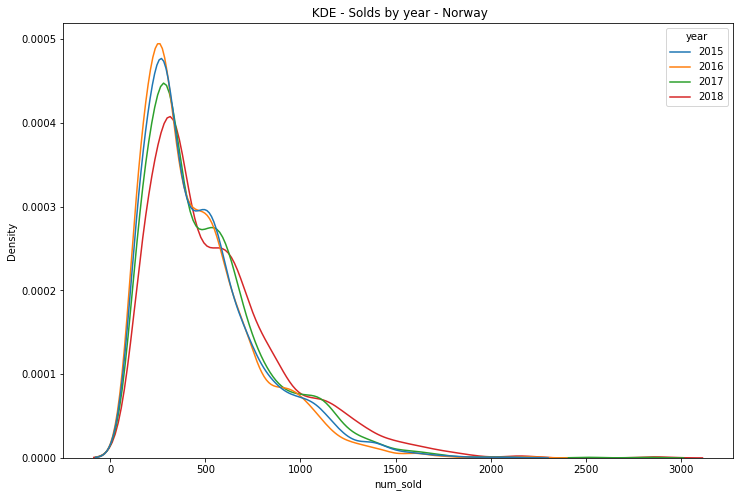

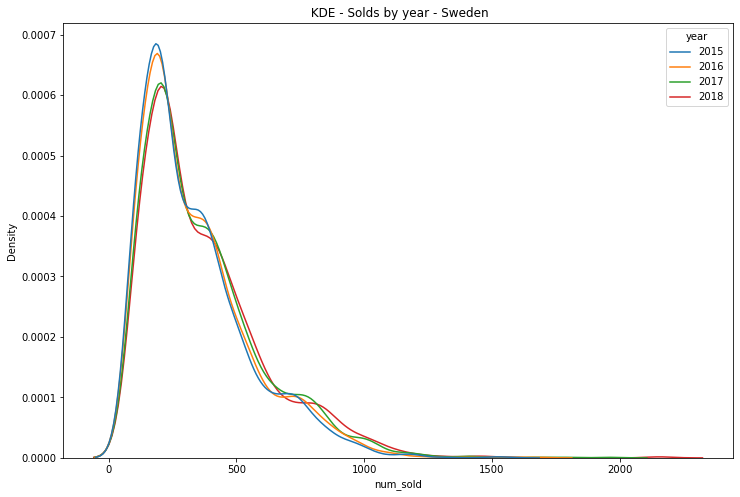

In [76]:
for i in countrys:
    plt.figure(figsize=(12,8))
    sns.kdeplot(data=train[train['country'] == i], x="num_sold", hue="year",palette="tab10").set_title(' KDE - Solds by year - ' + i)

###  Sold by Months

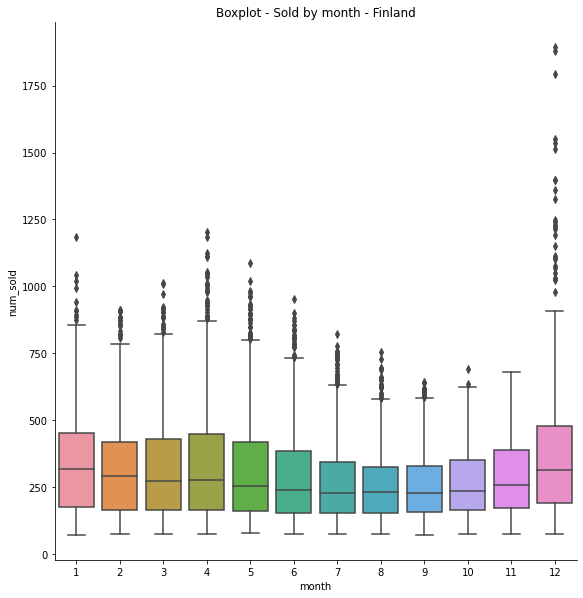

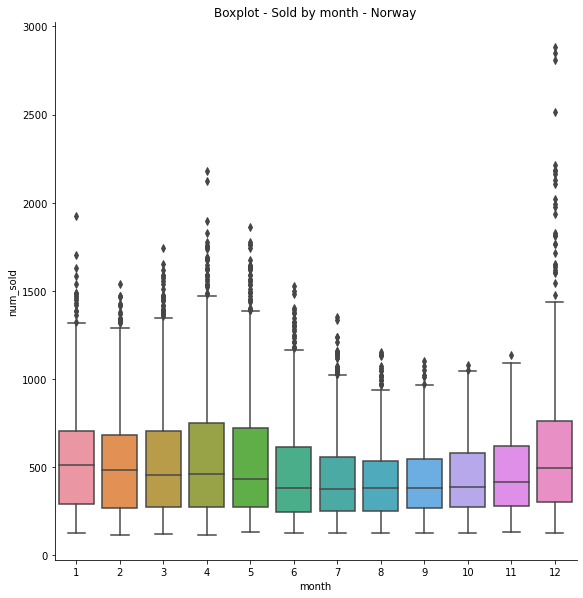

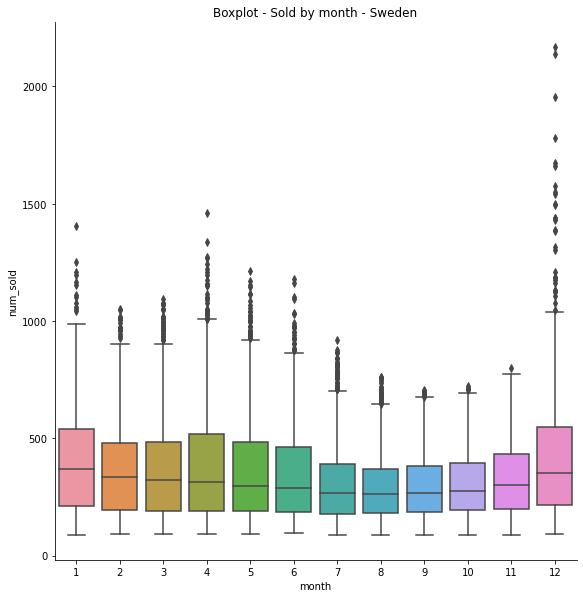

In [74]:
for i in countrys:
    sns.catplot(x="month", y="num_sold", kind="box", data=train[train['country'] == i],height=8,aspect=1)
    plt.title('Boxplot - Sold by month - ' + i)

###  Sold by Months and store

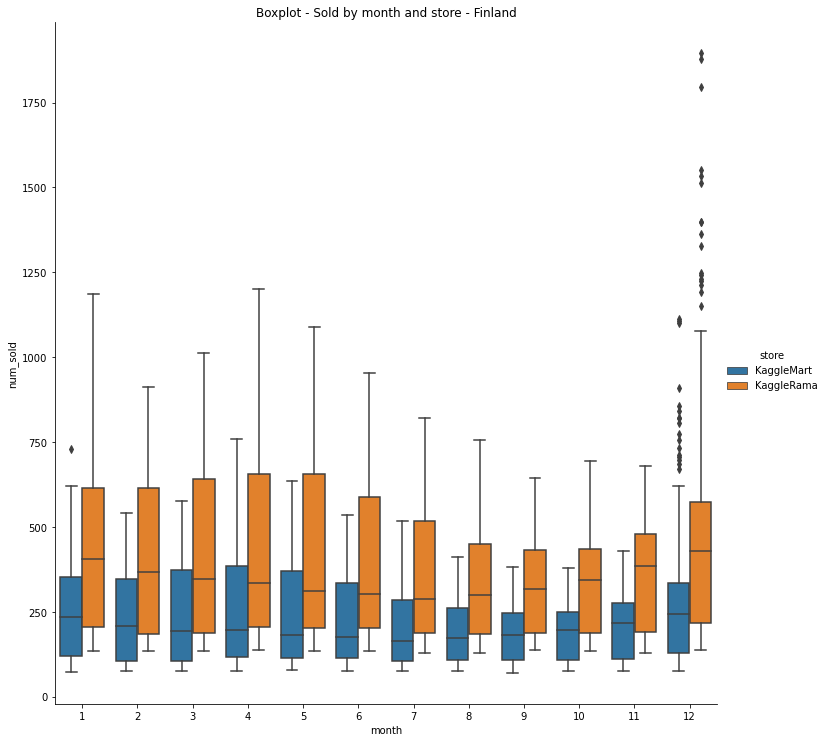

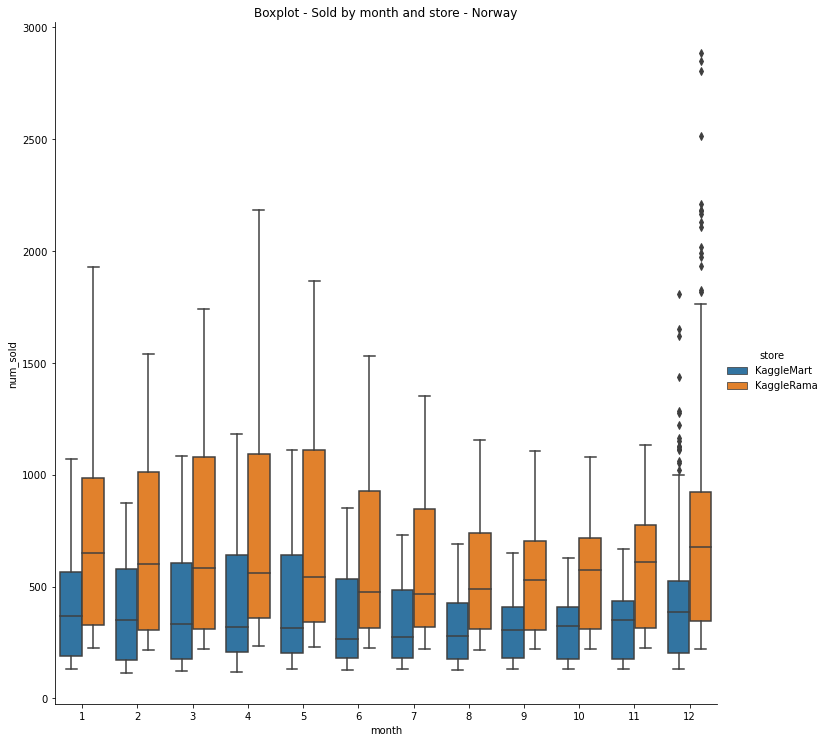

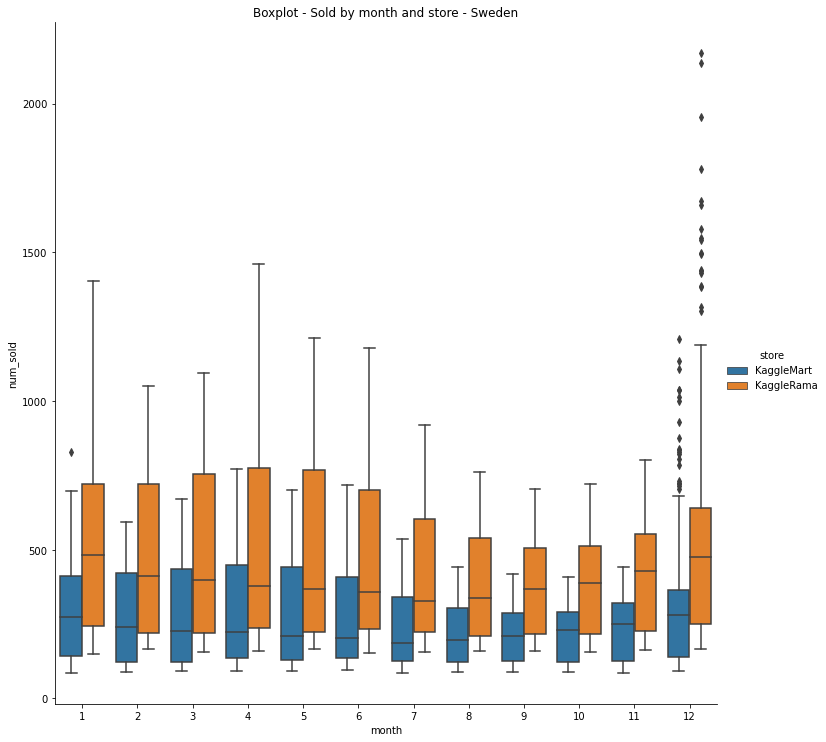

In [77]:
#Cantidad vendida por mes y tienda

for i in countrys:
    sns.catplot(x="month", y="num_sold",hue="store",kind="box", data=train[train['country'] == i],height=10,aspect=1)
    plt.title('Boxplot - Sold by month and store - ' + i)

###  Sold by week of the year

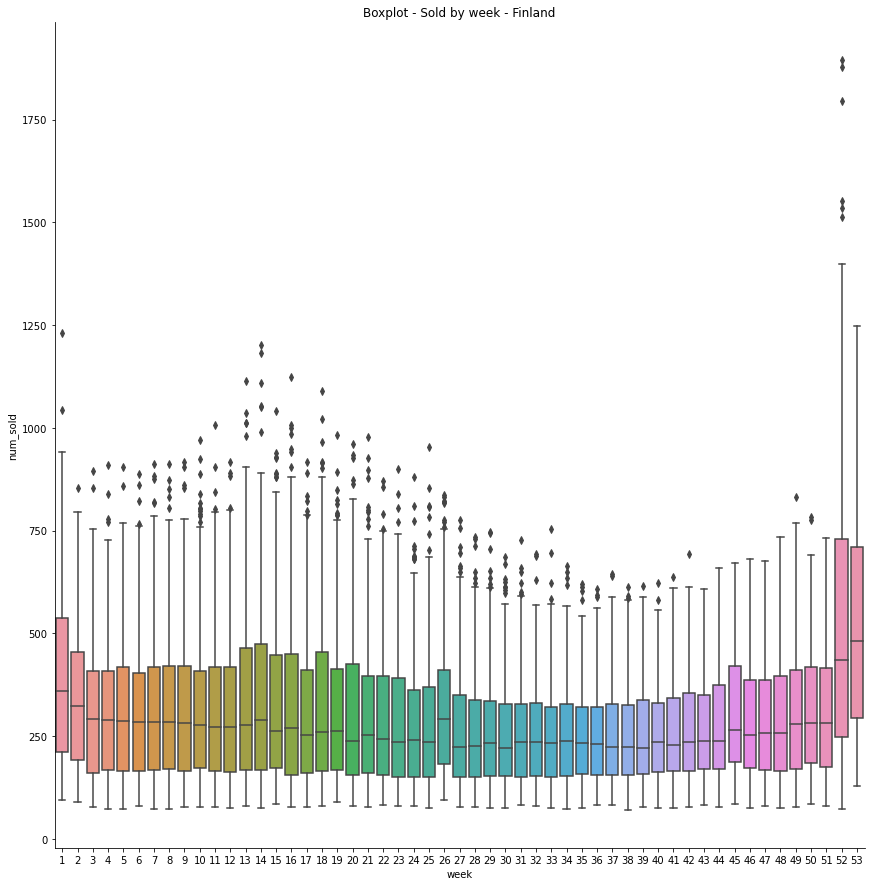

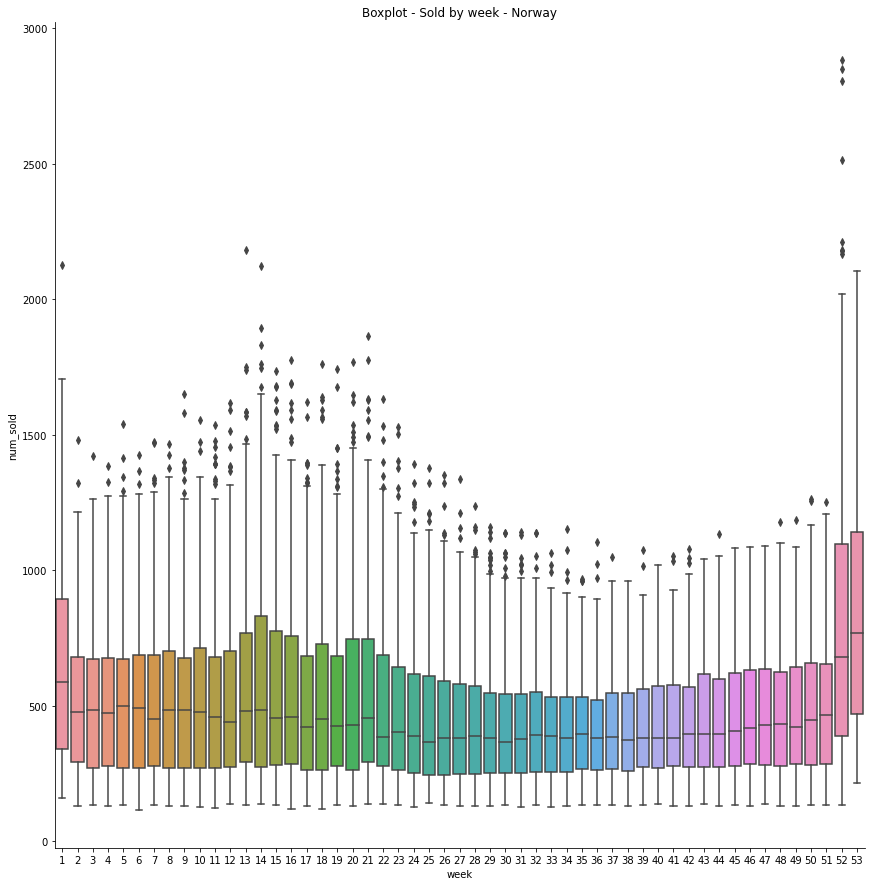

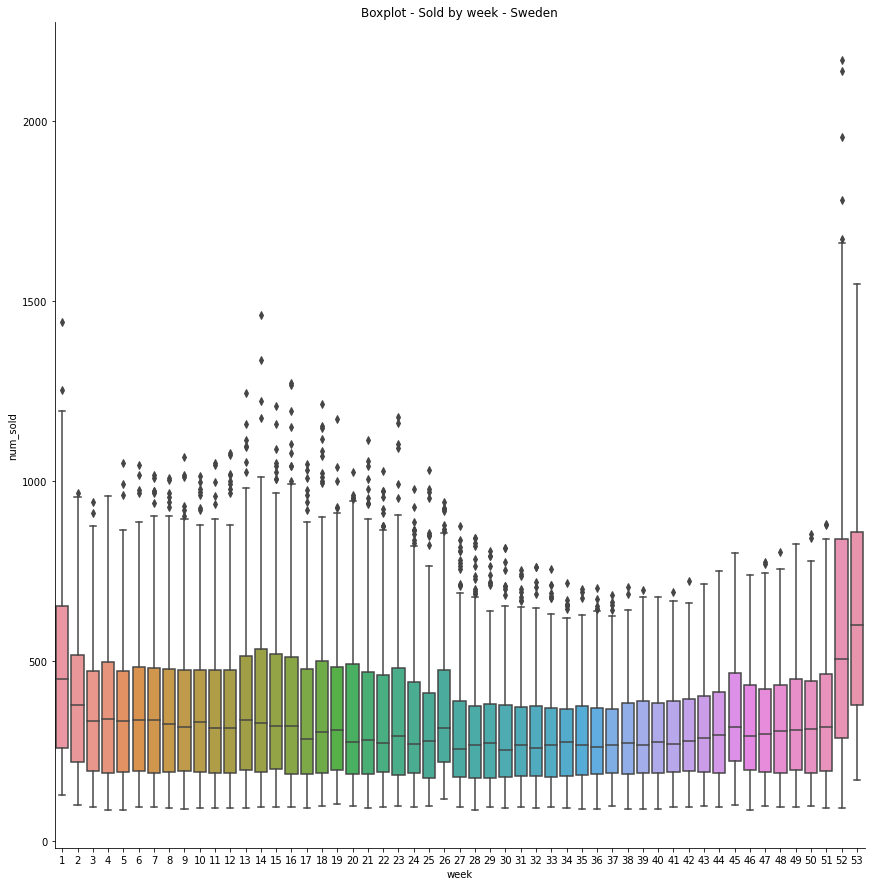

In [78]:
#Cantidad vendida por semana

for i in countrys:
    sns.catplot(x="week", y="num_sold", kind="box", data=train[train['country'] == i],height=12, aspect=1)
    plt.title('Boxplot - Sold by week - ' + i)

###  Sold by day of the week

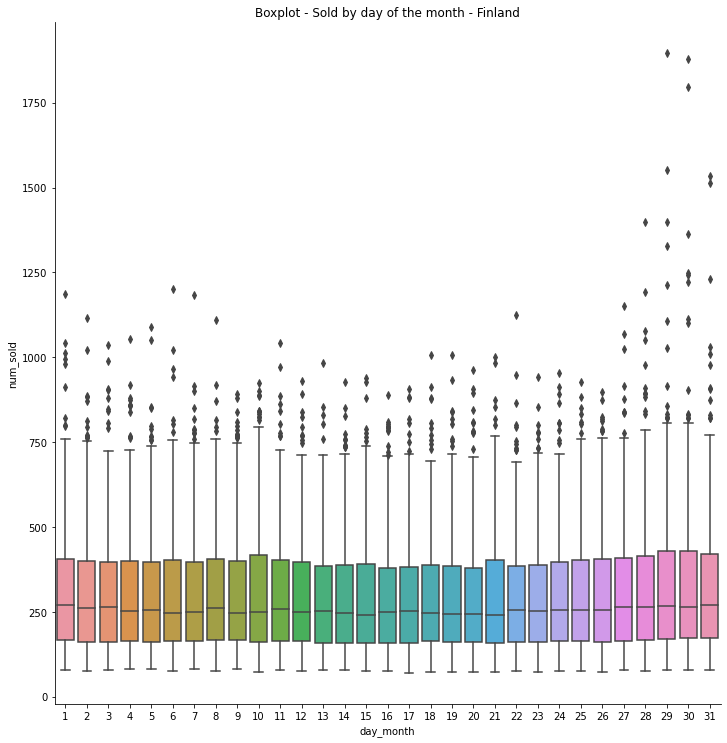

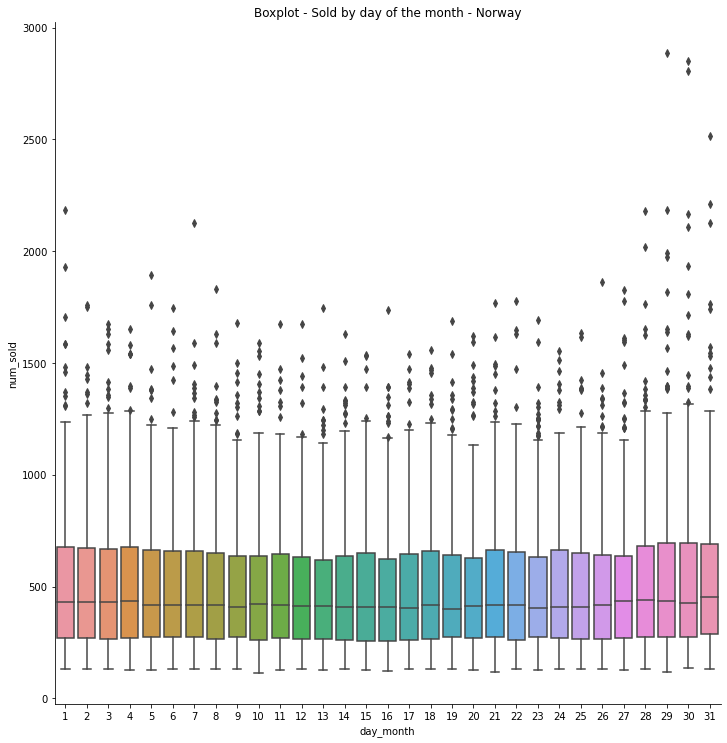

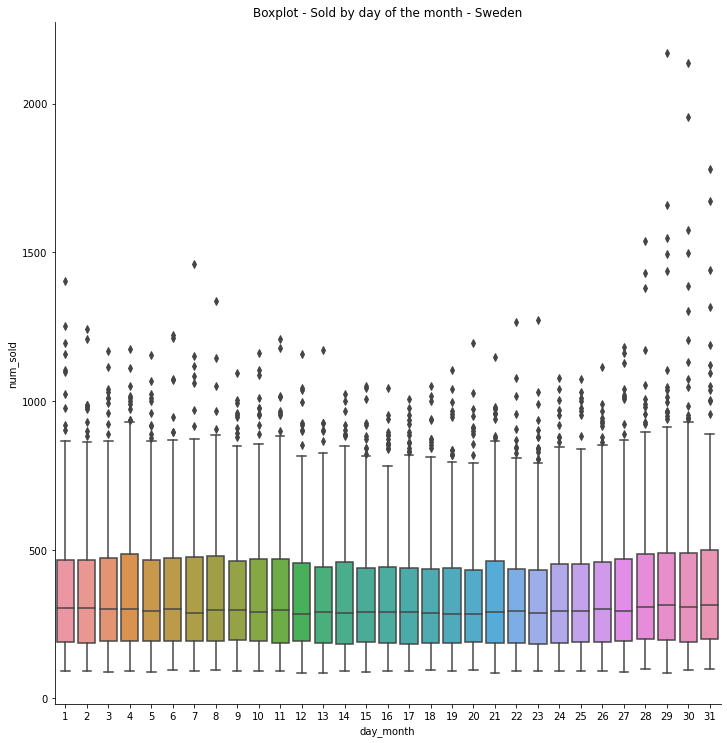

In [79]:
#Cantidad vendida por dia del mes

for i in countrys:
    sns.catplot(x="day_month", y="num_sold", kind="box", data=train[train['country'] == i],height=10, aspect=1)
    plt.title('Boxplot - Sold by day of the month - ' + i)

### Sales by store depending on the day of the year and store

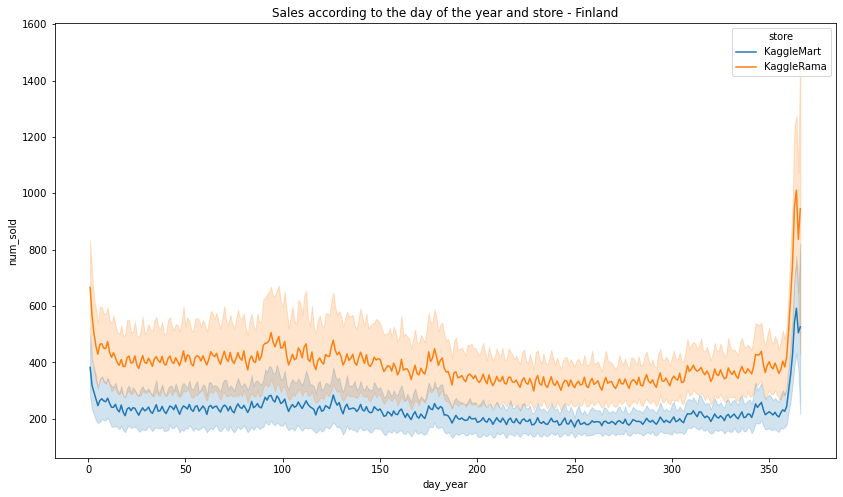

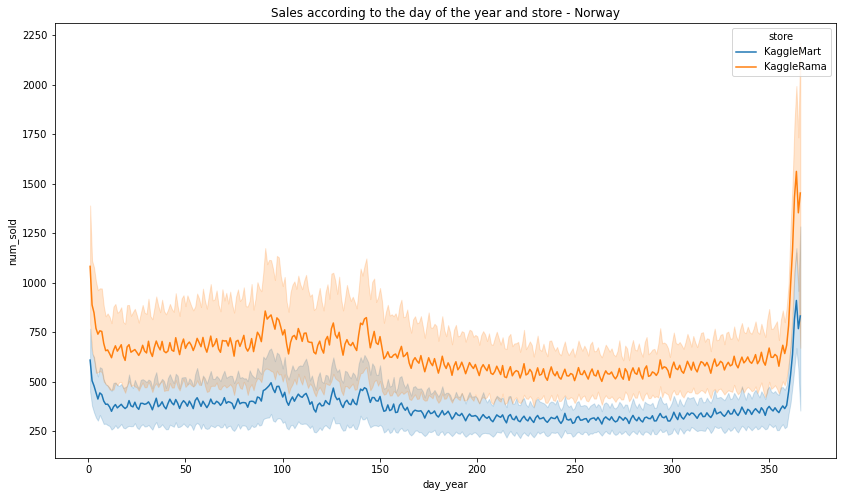

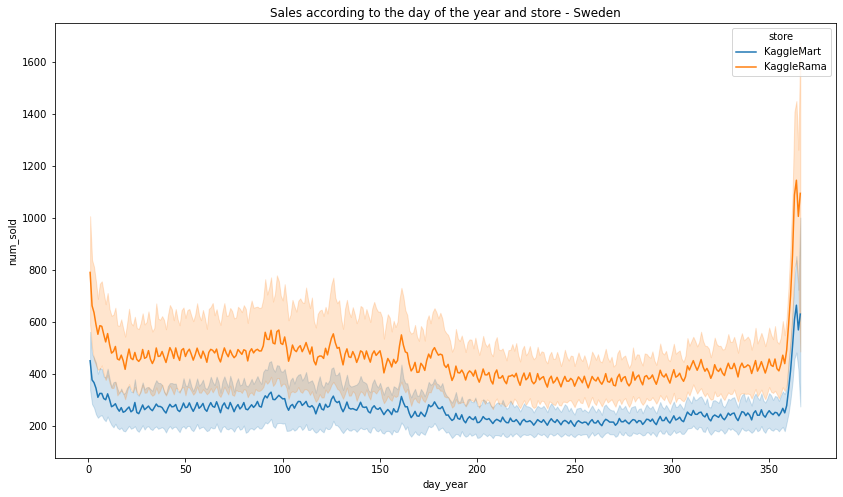

In [82]:
for i in countrys:
    plt.figure(figsize=(14,8))
    sns.lineplot(data=train[train['country'] == i], x="day_year", y="num_sold",hue="store").set_title('Sales according to the day of the year and store - ' + i)

### Sales by store depending on the day of the year and product

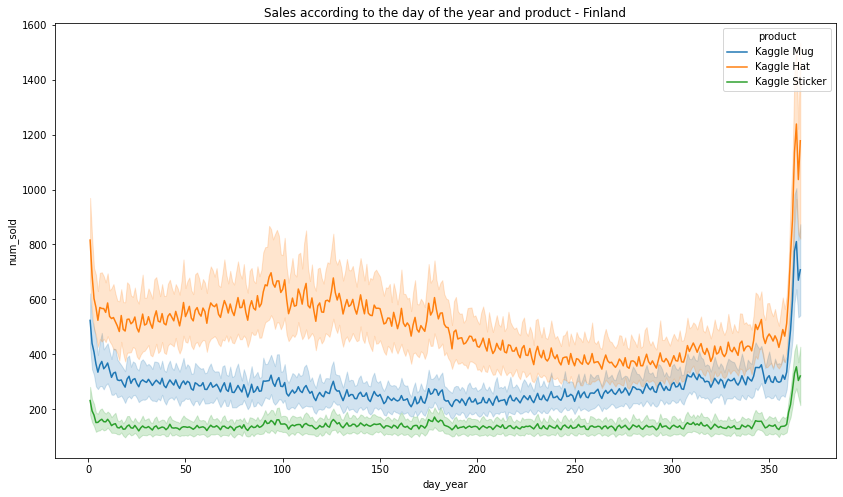

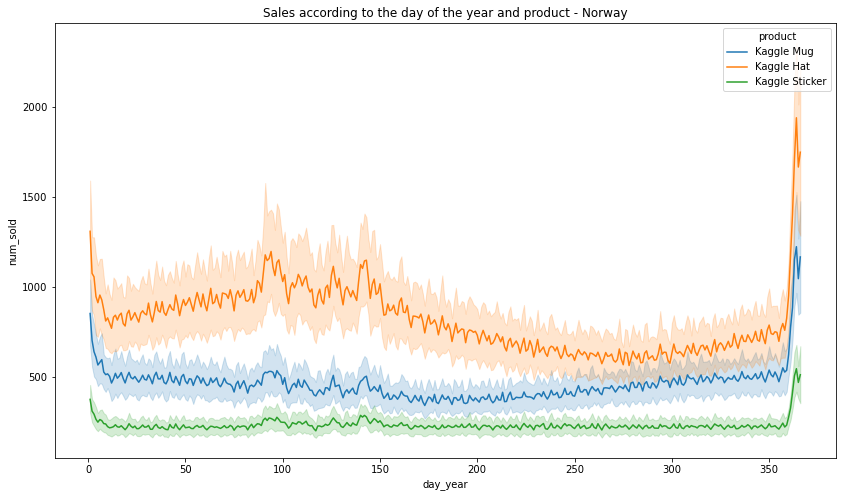

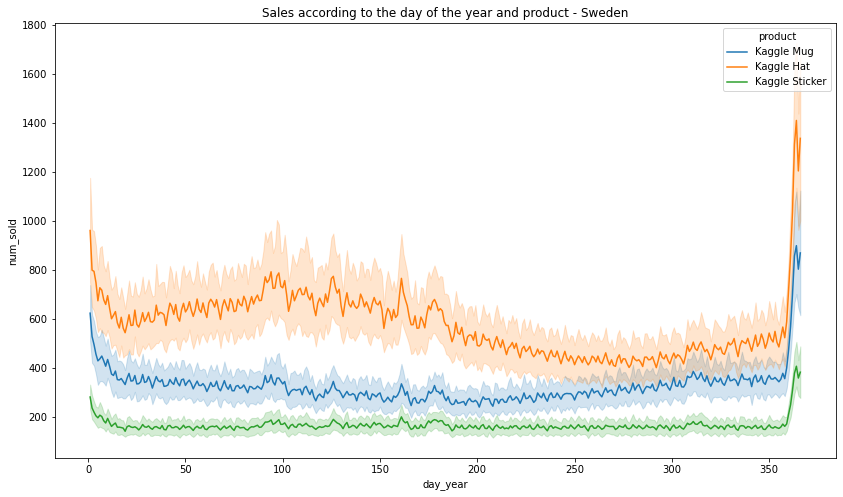

In [83]:
for i in countrys:
    plt.figure(figsize=(14,8))
    sns.lineplot(data=train[train['country'] == i], x="day_year", y="num_sold",hue="product").set_title('Sales according to the day of the year and product - ' + i)